# **HW 2: Bank Marketing**
<hr>

<u>**Members**</u><br>
Tharnarch Thoranisttakul 63340500025<br>
Athimet Aiewcharoen 63340500068
<hr>

## **Functions and Necessary Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import pandas_profiling as pp

# Preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder, OrdinalEncoder , OneHotEncoder

# Fetures selection
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold, StratifiedKFold, cross_val_score

# Neural network
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Resampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

# Classification metrics
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, precision_recall_curve
from sklearn import metrics

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Make image directory (img)
import os
if not os.path.exists('img'):
    os.mkdir('img')

## **Data Exploration**

From the description file, there are a total of 17 features in this dataset which are:

|Feature Name|Description|Data Type|
|:-:|-|:-:|
|<font color='green'>age</font>|Customer's age (in years)|<font color='red'>Numerical</font>|
|<font color='green'>job</font>|Types of Job|<font color='red'>Categorical</font>|
|<font color='green'>marital</font>|Marital Status|<font color='red'>Categorical</font>|
|<font color='green'>education</font>|Education|<font color='red'>Categorical</font>|
|<font color='green'>default</font>|Has credit in Default?|<font color='red'>Categorical</font>|
|<font color='green'>balance</font>|Average yearly balance|<font color='red'>Numerical</font>|
|<font color='green'>housing</font>|Has housing loan?|<font color='red'>Categorical</font>|
|<font color='green'>loan</font>|Has personal loan?|<font color='red'>Categorical</font>|
|<font color='green'>contact</font>|Contact Communication Type|<font color='red'>Categorical</font>|
|<font color='green'>day</font>|Last contact day of the month|<font color='red'>Numerical</font>|
|<font color='green'>month</font>|Last contact month of the year|<font color='red'>Categorical</font>|
|<font color='green'>duration</font>|Last contact duration (in seconds).<br><br> Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.|<font color='red'>Numerical</font>|
|<font color='green'>campaign</font>|no. of contacts performed during this campaign and for this client|<font color='red'>Numerical</font>|
|<font color='green'>pdays</font>|no. of days that passed by after the client was last contacted from a previous campaign|<font color='red'>Numerical</font>|
|<font color='green'>previous</font>|no. of contacts performed before this campaign and for this client|<font color='red'>Numerical</font>|
|<font color='green'>poutcome</font>|outcome of the previous marketing campaign|<font color='red'>Categorical</font>|
|<font color='green'>y</font>|has the client subscribed a term deposit?|<font color='red'>Categorical</font> [Output]|

Number of instances: 45211 for bank-full.csv <br>
Number of Attributes: 16 + output attribute (17)<br>
(45211 rows, 17 columns)

Missing Attribute Values: None

### **Import Dataset**

In [2]:
dfOri = pd.read_csv('../HWdata/bank/bank-full.csv', sep=';')
df = dfOri.copy()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

We can see that this dataset has 45211 instances and 17 features.

### **Check and Remove Duplicates**

In [4]:
df.duplicated().sum()

0

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


After dropping the unnecessary features, we are left with 16 features including output (y).

In which, there are:

- 10 features, including output, that are '<font color='green'>object</font>', which means that they are '<font color='red'>Categorical Features</font>'.
- 7 features that are '<font color='green'>int64</font>', which means that they are '<font color='red'>Numerical Features</font>'

### **Sort Features**
**Order:**
1. Numerical Features
2. Categorical Features
3. Output

**Separate Numerical Features from Dataset**

In [7]:
dfNum = df.select_dtypes(include=['int64'])

**Separate Categorical Features from Dataset**

In [8]:
dfCate = df.select_dtypes(include=['object'])
dfCate = dfCate.iloc[:,:-1]

**Separate Output from Dataset**

In [9]:
dfOut = df.iloc[:,len(df.columns)-1:len(df.columns)]

**Concatenate Separated Data**

In [10]:
df = pd.concat([dfNum, dfCate, dfOut], axis=1)
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   balance    45211 non-null  int64 
 2   day        45211 non-null  int64 
 3   duration   45211 non-null  int64 
 4   campaign   45211 non-null  int64 
 5   pdays      45211 non-null  int64 
 6   previous   45211 non-null  int64 
 7   job        45211 non-null  object
 8   marital    45211 non-null  object
 9   education  45211 non-null  object
 10  default    45211 non-null  object
 11  housing    45211 non-null  object
 12  loan       45211 non-null  object
 13  contact    45211 non-null  object
 14  month      45211 non-null  object
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 6.2+ MB


### **Overall Report**

In [12]:
profile = pp.ProfileReport(df, title="Bank Full Report")
# profile.to_file('HW2OverallReport.html')
# profile.to_notebook_iframe()

#### **Plot Features of Separated Output**

<AxesSubplot:ylabel='Type'>

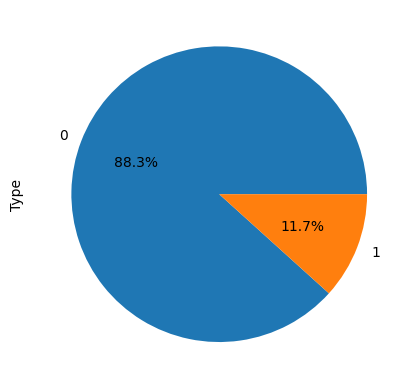

In [13]:
df.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')

In [14]:
dfyes = df[df['y'] == 1]
dfno = df[df['y'] == 0]

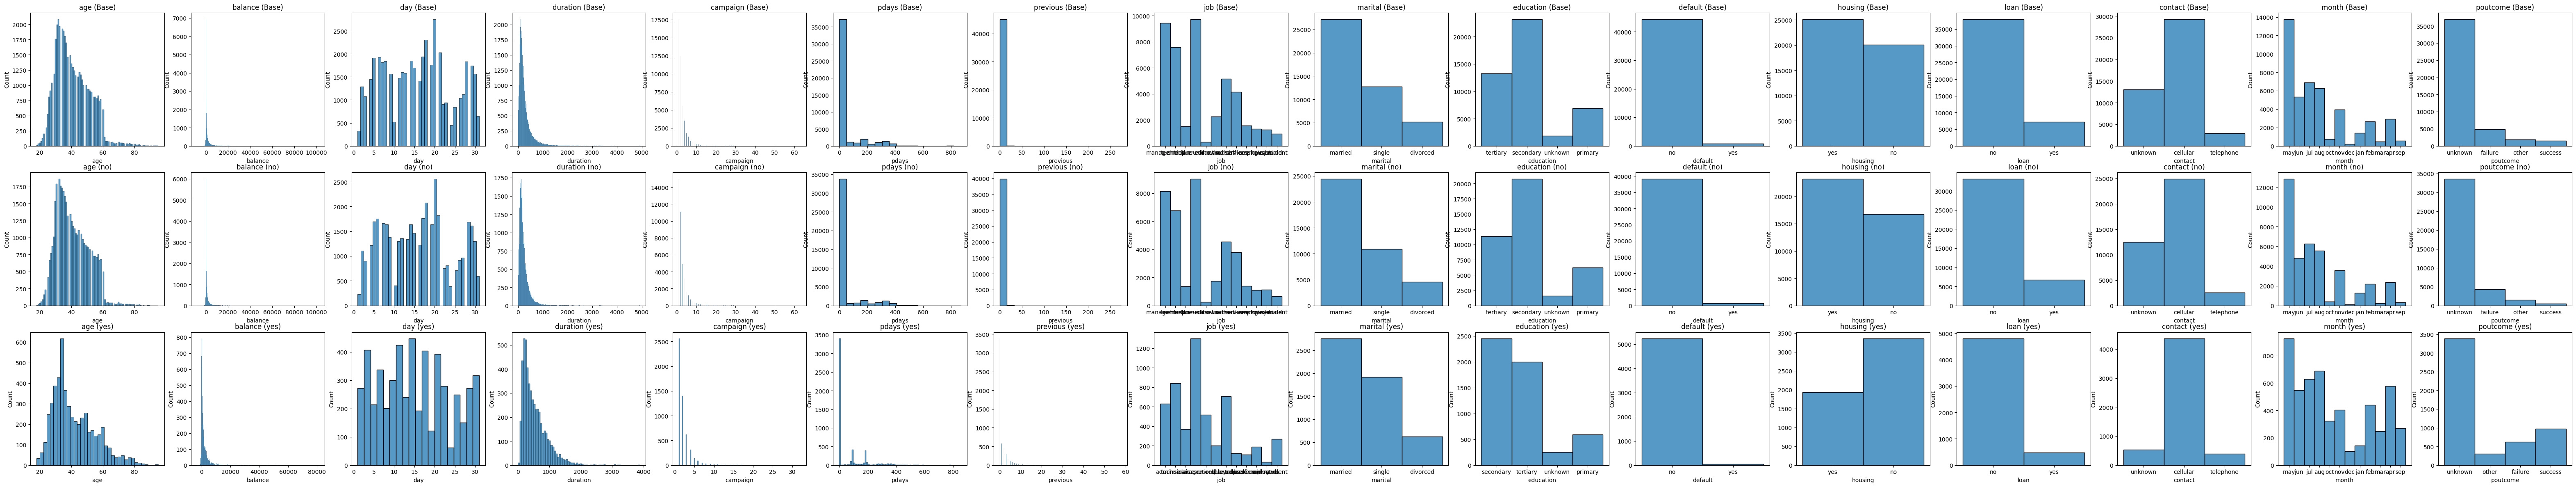

In [15]:
plt.figure(figsize=(80, 80))
for idx, col in enumerate(df.columns):
    if col != 'y':
        plt.subplot(16, 16, idx+1)
        sns.histplot(df[col], kde=False)
        plt.title(col + ' (Base)')
for idx, col in enumerate(dfyes.columns):
    if col != 'y':
        plt.subplot(16, 16, idx+len(dfno.columns))
        sns.histplot(dfno[col], kde=False)
        plt.title(col + ' (no)')
for idx, col in enumerate(dfno.columns):
    if col != 'y':
        plt.subplot(16, 16, idx+(len(dfno.columns)*2)-1)
        sns.histplot(dfyes[col], kde=False)
        plt.title(col + ' (yes)')
plt.savefig('img/AllHists.png', bbox_inches='tight')

From here, we will be taking some features that are noticeably different when plotting against output to re-plot it for better visualization.

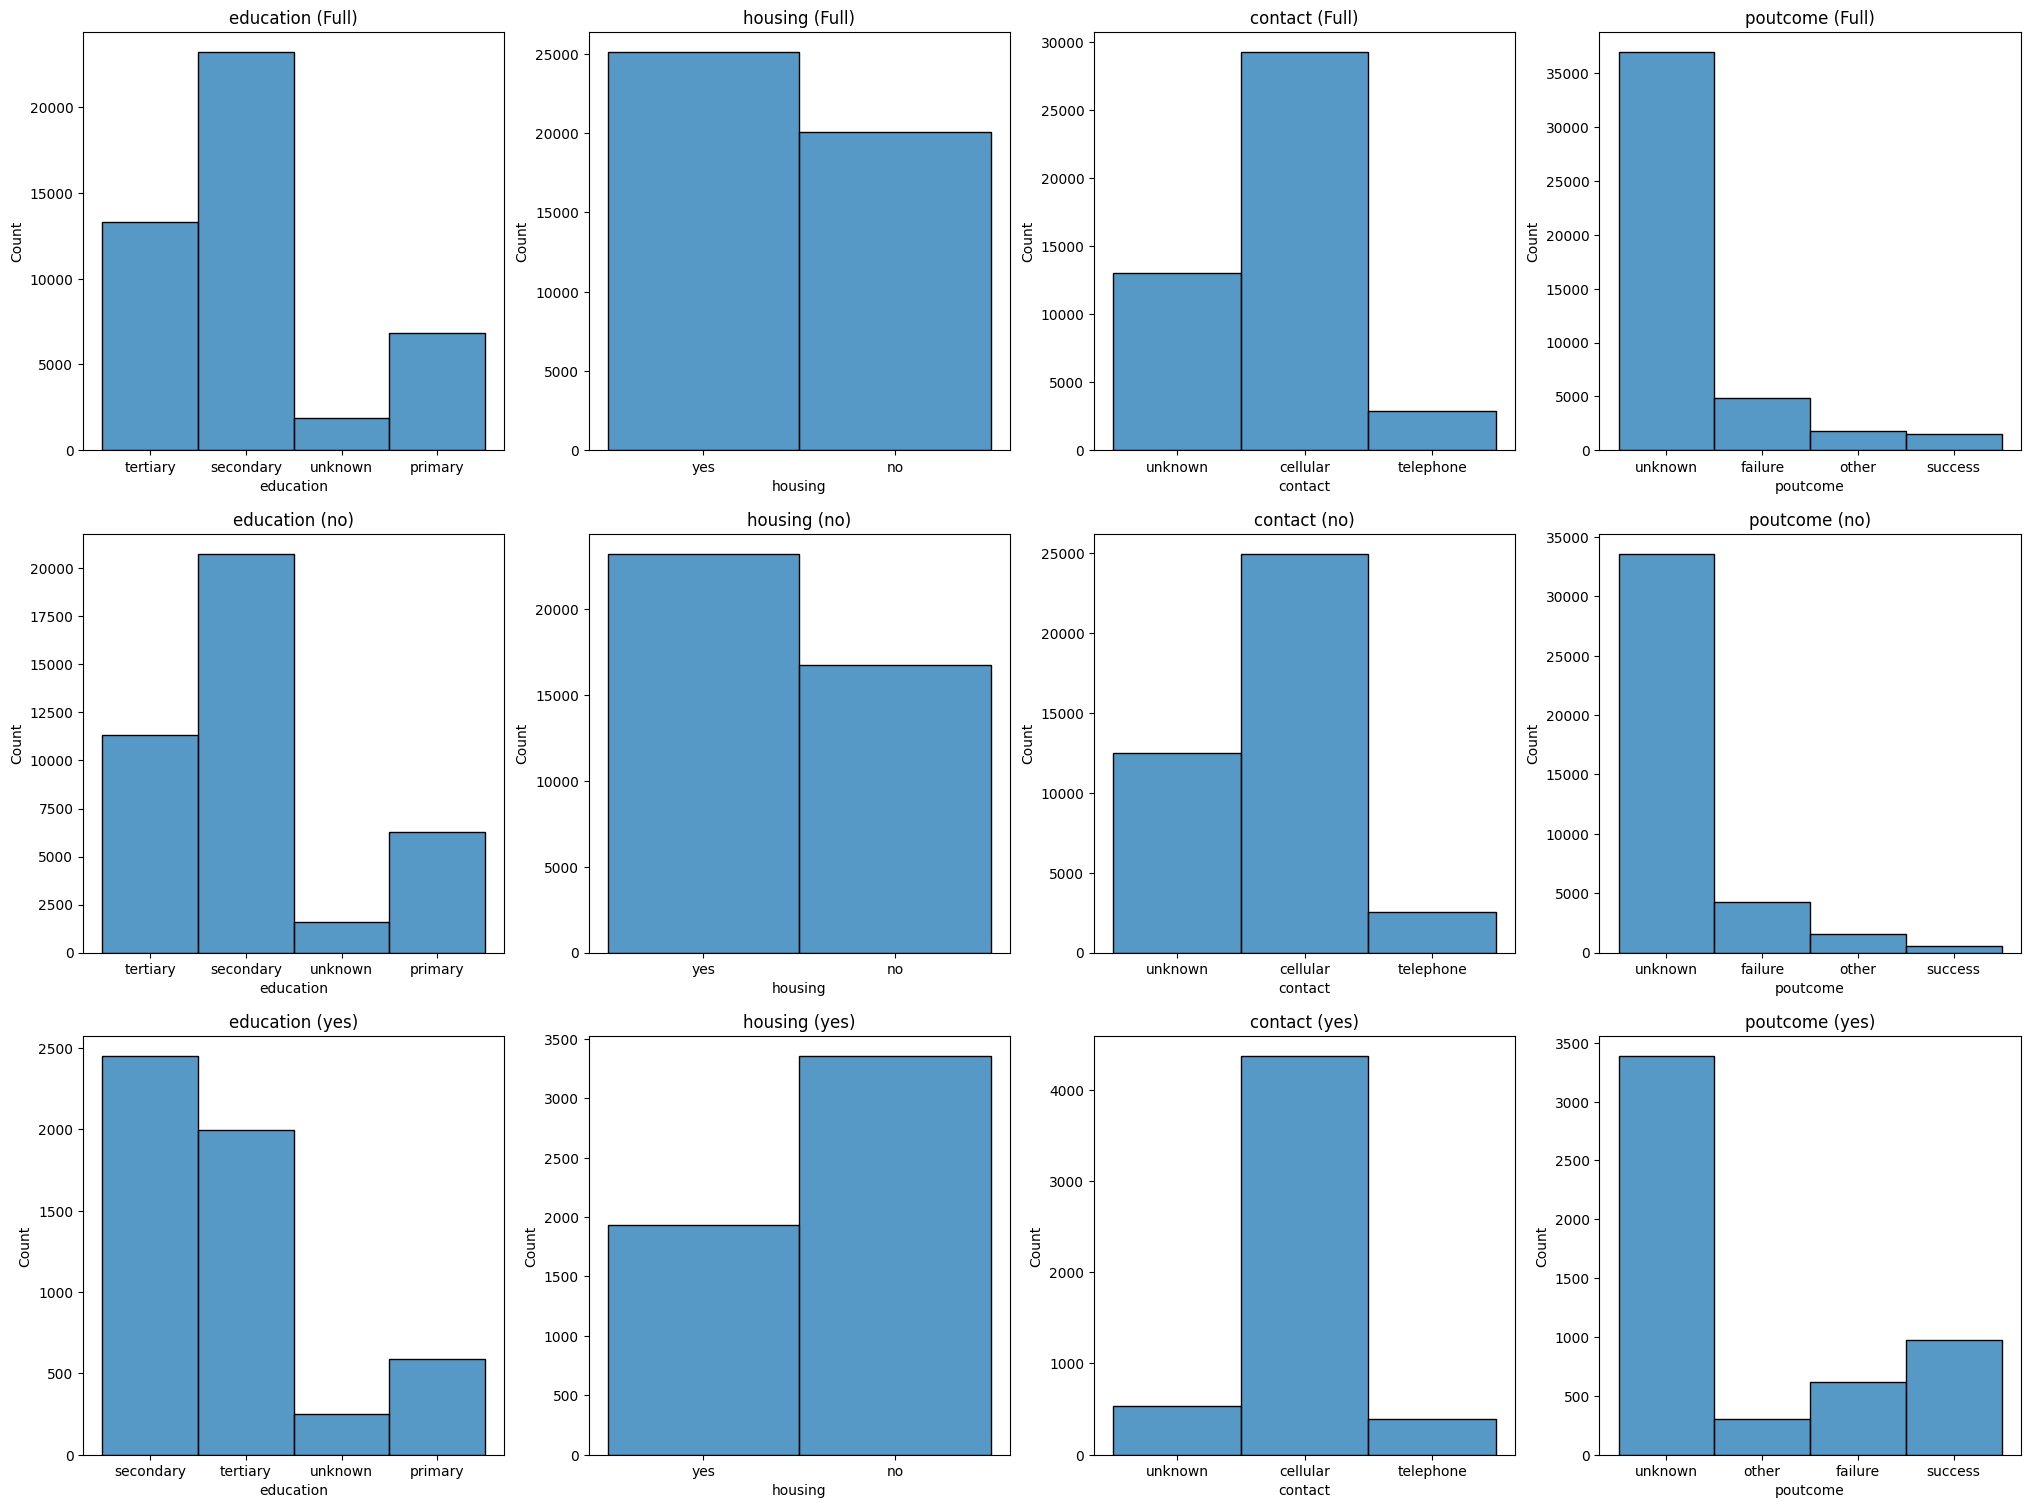

In [16]:
colToPlot = ['education', 'housing', 'contact', 'poutcome']
plt.figure(figsize=(25,25))
for idx, col in enumerate(colToPlot):
    plt.subplot(4, 4, idx+1)
    sns.histplot(df[col], kde=False)
    plt.title(col + ' (Full)')
for idx, col in enumerate(colToPlot):
    plt.subplot(4, 4, idx+len(colToPlot)+1)
    sns.histplot(dfno[col], kde=False)
    plt.title(col + ' (no)')
for idx, col in enumerate(colToPlot):
    plt.subplot(4, 4, idx+1+(len(colToPlot)*2))
    sns.histplot(dfyes[col], kde=False)
    plt.title(col + ' (yes)')
plt.savefig('img/SelectedHists.png', bbox_inches='tight')

We can see that these features have different charts when plotting against each output. Features plotted against output 'yes' have different bar charts compared to features plotted against all output data while features plotted against output 'no' has the same bar charts.

|Feature Names|Information|
|-|-|
|education|The client with 'secondary' education level has more chance to subscribe a term deposit|
|housing|The client with 'no' housing loan has more chance to subscribe a term deposit|
|contact|The client with 'unknown' communication type has more chance not to subscribe a term deposit|
|poutcome|The client with 'success' outcome of the previous marketing campaign has more chance to subscribe a term deposit|

#### **Pairplotting Data Samples**

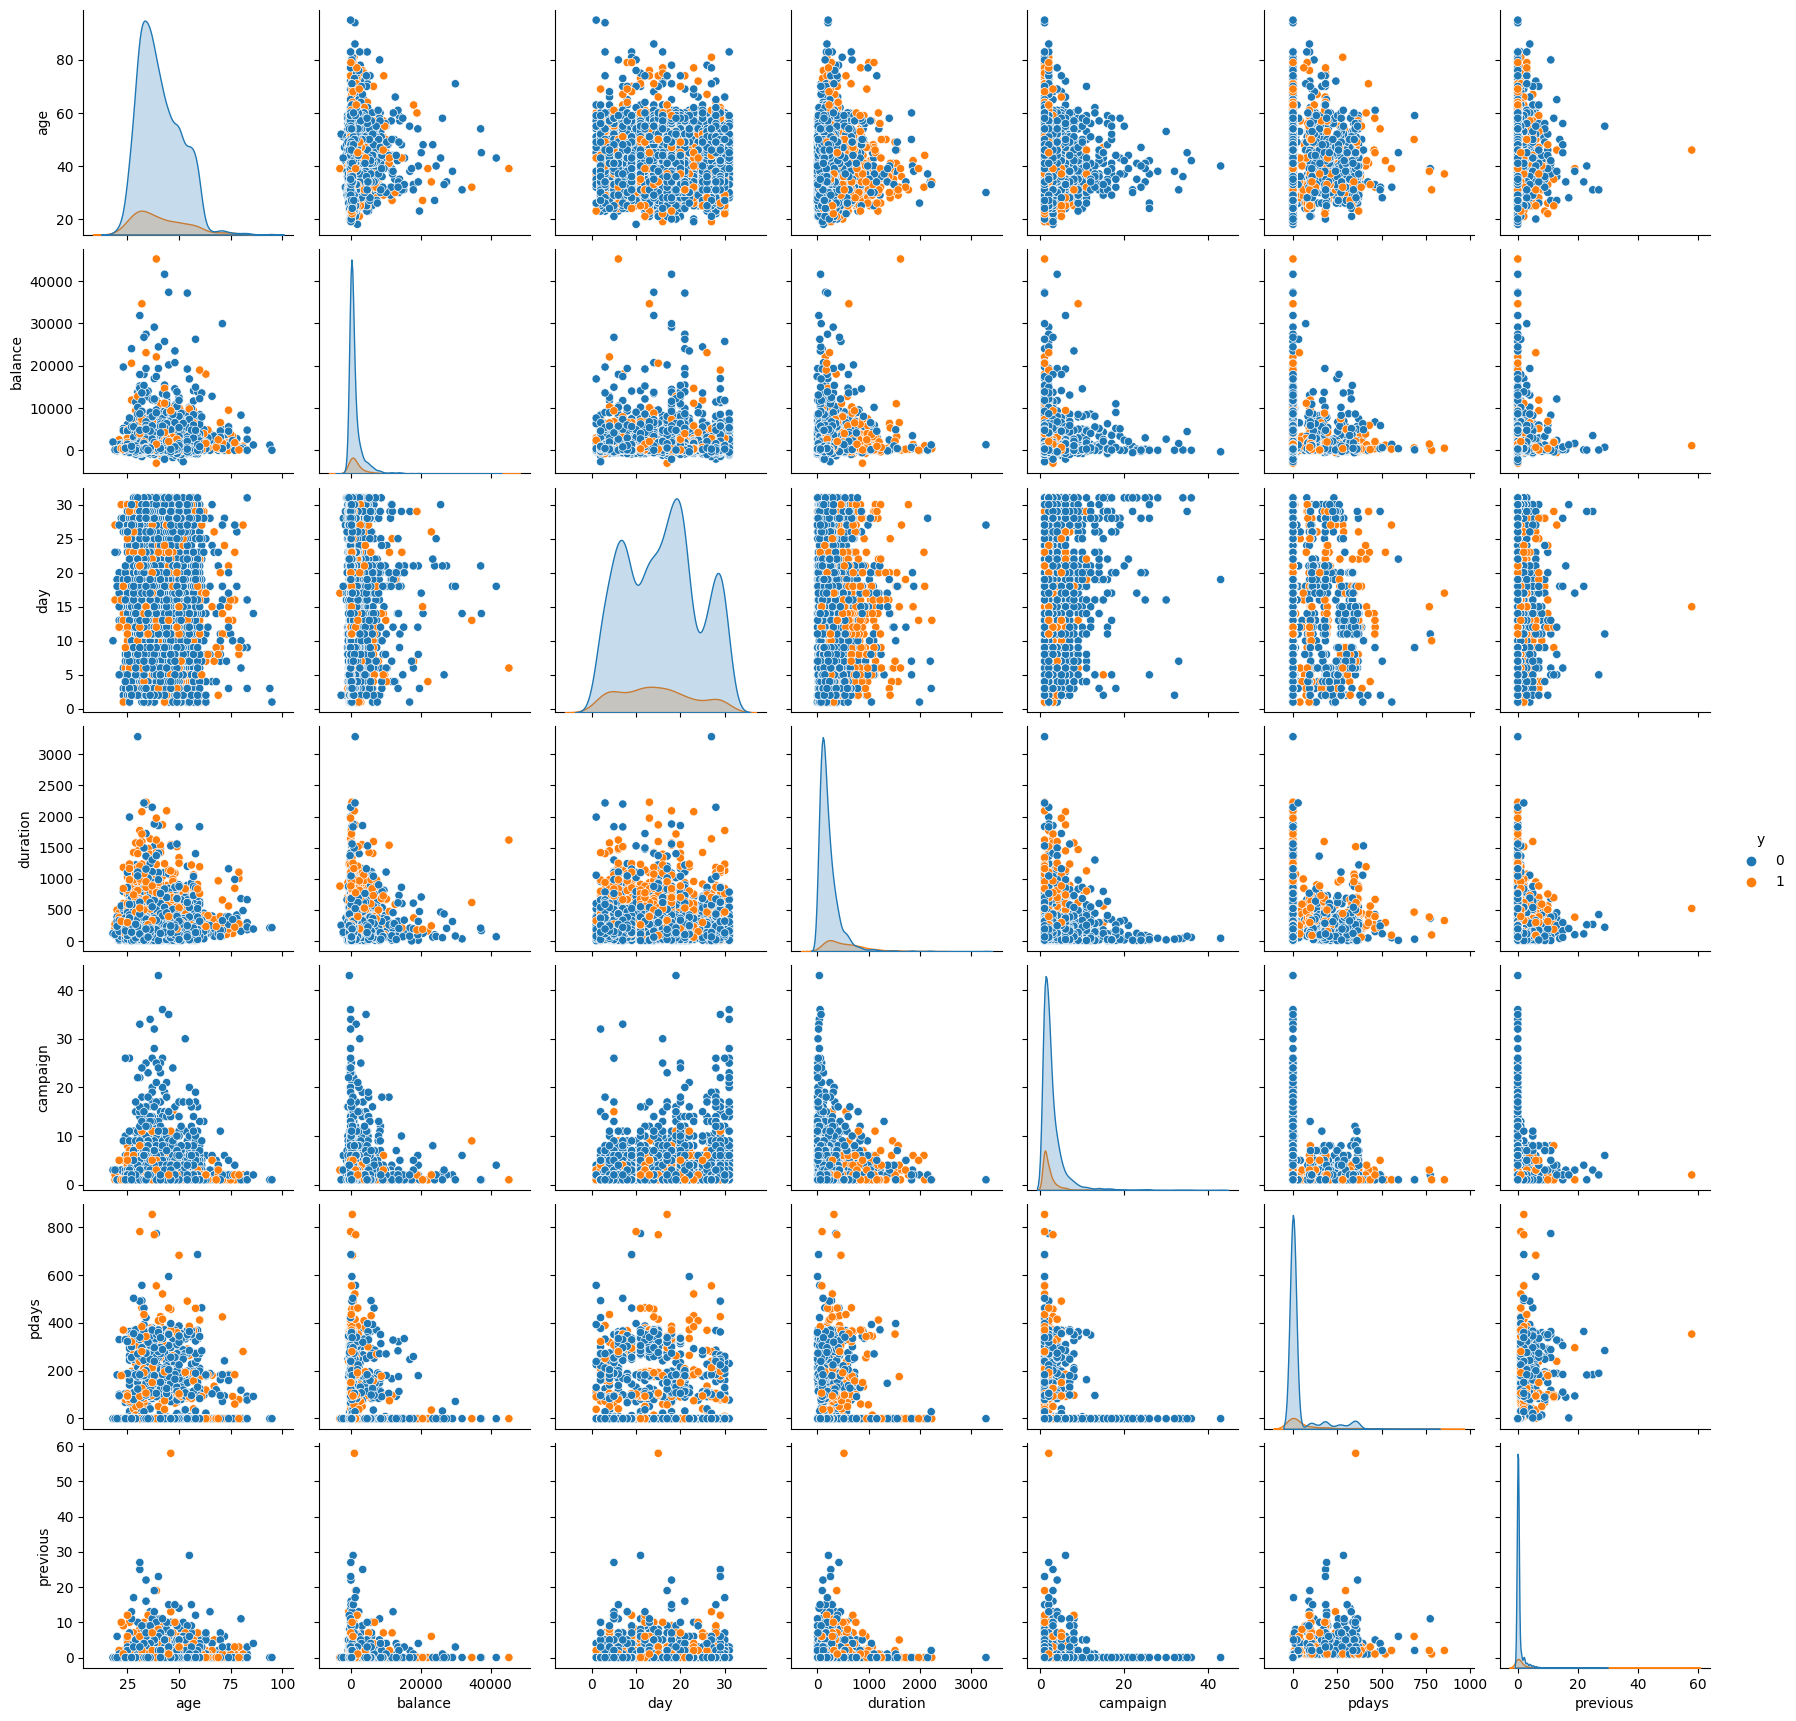

In [17]:
sns.pairplot(df.sample(int(df.shape[0]/10), random_state=777), diag_kind="kde", hue='y')
plt.savefig('img/PairplotSample.png', bbox_inches='tight')

As we can see when pairplotting, variance between features are quite low, so that we can't see the difference between 'no' and 'yes' output, variance within class are quite high in some feature.

#### **Check for Outliers**

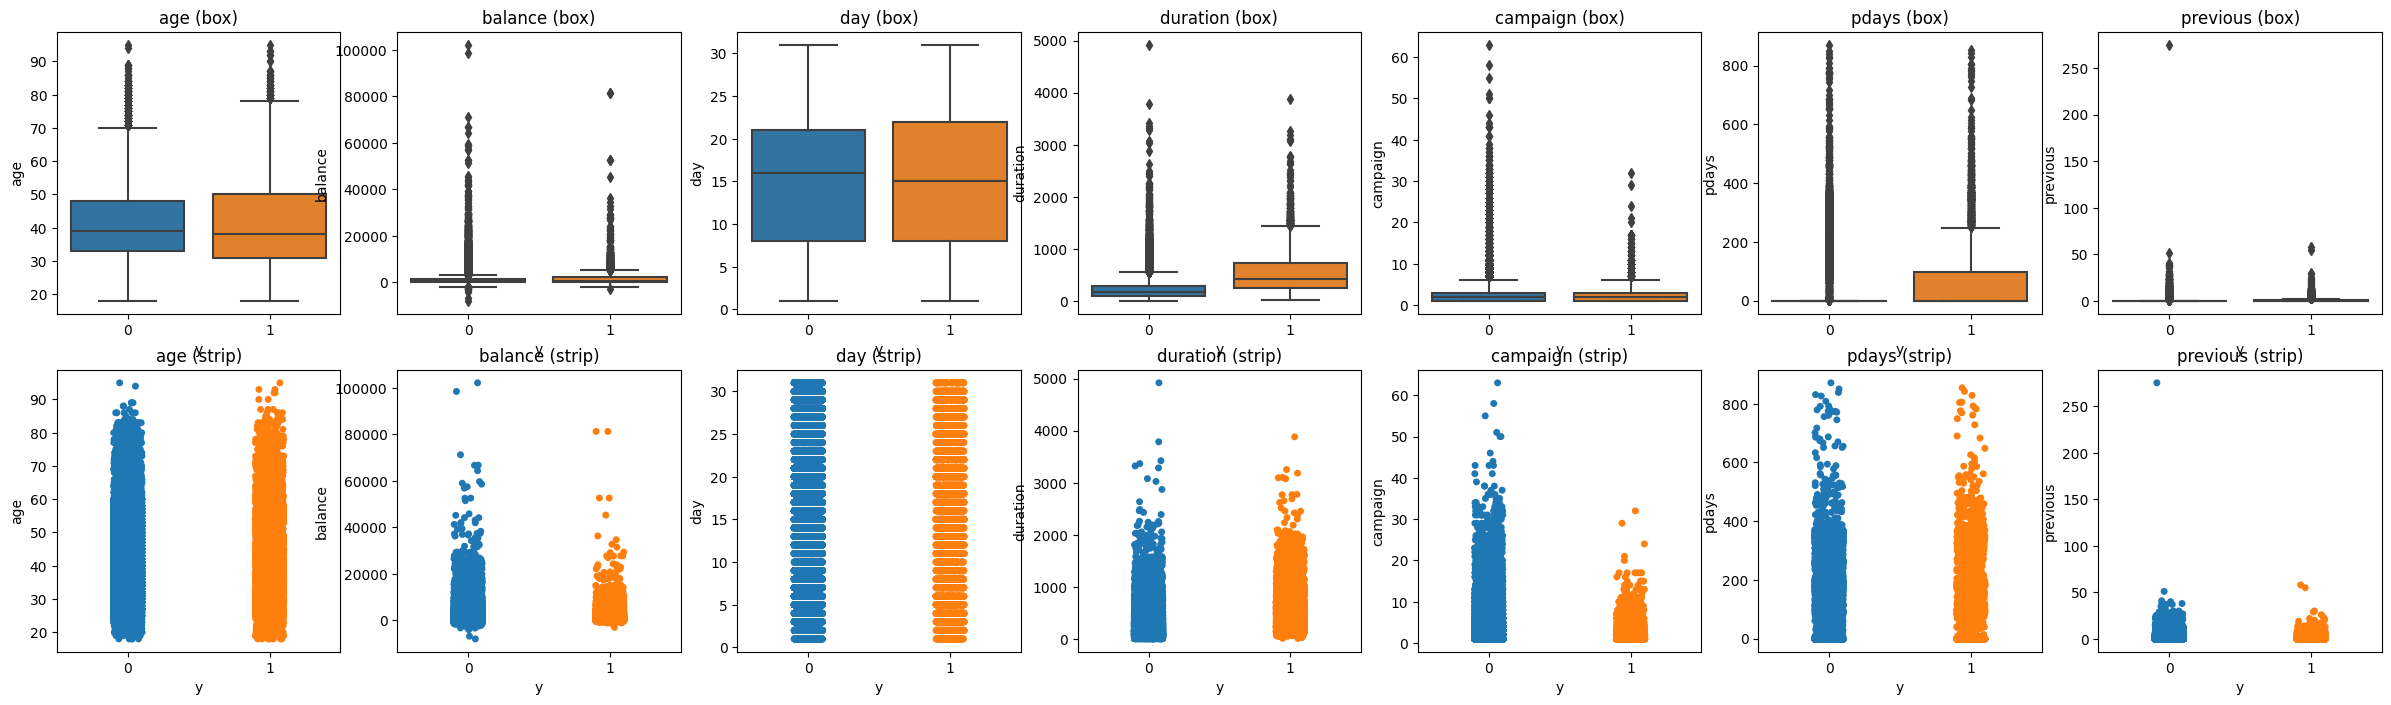

In [18]:
plt.figure(figsize=(30,30))
for idx, col in enumerate(dfNum.columns):
    plt.subplot(7, 7, idx+1)
    sns.boxplot(x='y', y=col, data=df)
    plt.title(col + ' (box)')
for idx, col in enumerate(dfNum.columns):
    plt.subplot(7, 7, idx+len(dfNum.columns)+1)
    sns.stripplot(x="y", y=col, data=df)    
    plt.title(col + ' (strip)')
plt.savefig('img/BoxStrip.png', bbox_inches='tight')

From the plot above, outliers can be seen in the following features:
- balance
- duration
- campaign
- previous

We will remove the outliers at the start of data preprocessing.

### **Data Exploration's Conclusion**

From the overall report,

Plotting Histogram of Numerical Features:

|Feature Names|Distribution|
|-|-|
|age|Right-skewed|
|balance|Right-skewed|
|day|Uniform|
|duration|Right-skewed|
|campaign|Right-skewed|
|pdays|Right-skewed|
|previous|Right-skewed|

Plotting Values Count of Categorical Features:

|Feature Names|What we got|
|-|-|
|job|Most common jobs are 'blue-collar', 'management' and 'technician' (59.2% in total).|
|marital|60.2% of this data are 'Married', 28.3% are 'Single' and the rest are 'Divorced'|
|education|Mostly 'secondary' (51.3%) followed by 'tertiary' (29.4%), 'primary' (15.2%) and 'unknown' (4.1%)|
|default|Mostly 'false' (98.2%)|
|housing|55.6% are 'true' and the rest are 'false'|
|loan|Mostly 'false' (84%)|
|contact|Mostly 'cellular' (64.8%) followed by 'unknown' (28.8%) and 'telephone' (6.4%)|
|month|Mostly 'may' (30.4%)|
|poutcome|Mostly 'unknown' (81.7%) followed by 'failure' (10.8%), 'other' (4.1%) and 'success' (3.3%)|

Good things of this dataset:

|Good Things|Explanation|
|-|-|
|Filled Data in Numerical Features|There are no missing data (NaN) or unknown in numerical features of this dataset.|

Bad things of this dataset:

|Bad Things|Explanation|
|-|-|
|Data Explanation|Most features come with little to no explanation or bad explanation.|
|Data Distribution|There are no normal distributed data. Almost all of them are right-skewed.|
|Correlation|There are a lot of high correlation between features.|
|'poutcome' Features|This feature's data are mostly 'unknown' (around 81.7%).|
|Unknown Data|Unclear explanation of what unknown data means and there are a lot of them in categorical features.|
|Data Variation|As we can see when pairplotting, variance between features are quite low and variance within class are quite high in some feature, which means that data variation is very bad.|
|Output data|The output is imbalanced. ('1' is 11.7% and '0' is 88.3%)|

**NOTE**: For all 'Unknown' data in categorical features, we assumed 'Unknown' as a type of data because there are quite a lot of 'Unknown' data.

Furthermore, because we are dealing with a dataset from bank, those 'Unknown' data might be undisclosed information of the customers.

### **Hypothesis**
1. Outliers in features affects model's performance.
2. Imbalance data affects model's performance.
3. Right-skewed data affects model's performance.

<hr>

### **Benchmarking** (before data preprocessing)

In [19]:
#get the dummy variables for the categorical 
dfBM = df.copy()
dfBM = pd.get_dummies(dfBM, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

xBM = dfBM.drop(['y'], axis = 1)
yBM = dfBM['y']

xBM_train, xBM_test, yBM_train, yBM_test = train_test_split(xBM, yBM, test_size = 0.2, random_state = 0)

### **Decision Tree Classifier**

In [20]:
DT_clf = DecisionTreeClassifier(random_state=0)
DT_clf.fit(xBM_train,yBM_train)
print('Train score: ', DT_clf.score(xBM_train, yBM_train))
print('Test score: ', DT_clf.score(xBM_test, yBM_test))

Train score:  1.0
Test score:  0.8700652438350105


#### **Predict using Test Data**

In [21]:
yDT_pred_test = DT_clf.predict(xBM_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yBM_test, y_pred=yDT_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yBM_test, y_pred=yDT_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      7980
           1       0.45      0.47      0.46      1063

    accuracy                           0.87      9043
   macro avg       0.69      0.69      0.69      9043
weighted avg       0.87      0.87      0.87      9043

Confusion matrix on Test data
[[7373  607]
 [ 568  495]]


### **Multi-Layer Perceptron Classifier**

In [22]:
MLP_clf = MLPClassifier(random_state=1)
MLP_clf.fit(xBM_train,yBM_train)
print('Train score: ', MLP_clf.score(xBM_train, yBM_train))
print('Test score: ', MLP_clf.score(xBM_test, yBM_test))

Train score:  0.8924187126741872
Test score:  0.8908548048214088


#### **Predict using Test Data**

In [23]:
yMLP_pred_test = MLP_clf.predict(xBM_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yBM_test, y_pred=yMLP_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yBM_test, y_pred=yMLP_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7980
           1       0.72      0.12      0.20      1063

    accuracy                           0.89      9043
   macro avg       0.81      0.56      0.57      9043
weighted avg       0.87      0.89      0.85      9043

Confusion matrix on Test data
[[7931   49]
 [ 938  125]]


### **K-Nearest Neighbors**

In [24]:
KN_clf = KNeighborsClassifier(n_jobs=-1)
KN_clf.fit(xBM_train,yBM_train)
print('Train score: ', KN_clf.score(xBM_train, yBM_train))
print('Test score: ', KN_clf.score(xBM_test, yBM_test))

Train score:  0.9109710241097102
Test score:  0.8768107928784695


#### **Predict using Test Data**

In [25]:
yKN_pred_test = KN_clf.predict(xBM_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yBM_test, y_pred=yKN_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yBM_test, y_pred=yKN_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      7980
           1       0.46      0.25      0.33      1063

    accuracy                           0.88      9043
   macro avg       0.68      0.61      0.63      9043
weighted avg       0.85      0.88      0.86      9043

Confusion matrix on Test data
[[7659  321]
 [ 793  270]]


### Benchmark Conclusion

Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.93|0.92|0.93|0.87|Decision Tree|Test Data|
1|0.45|0.47|0.46|^|Decision Tree|Test Data|
0|0.94|0.92|0.93|0.88|MLP|Test Data|
1|0.50|0.59|0.54|^|MLP|Test Data|
0|0.91|0.96|0.93|0.88|K-Nearest|Test Data|
1|0.46|0.25|0.33|^|K-Nearest|Test Data|

<hr>

## **Data Preprocessing**

### **Experiment 1 : Remove Outliers**

#### **Hypothesis**
    
Outliers in features affects model's performance.

From the figure,

<img src='img/BoxStrip.png'/>

we will be removing outliers from the following features:
- balance
- duration
- campaign
- previous

In [26]:
dfEX1 = df.copy()

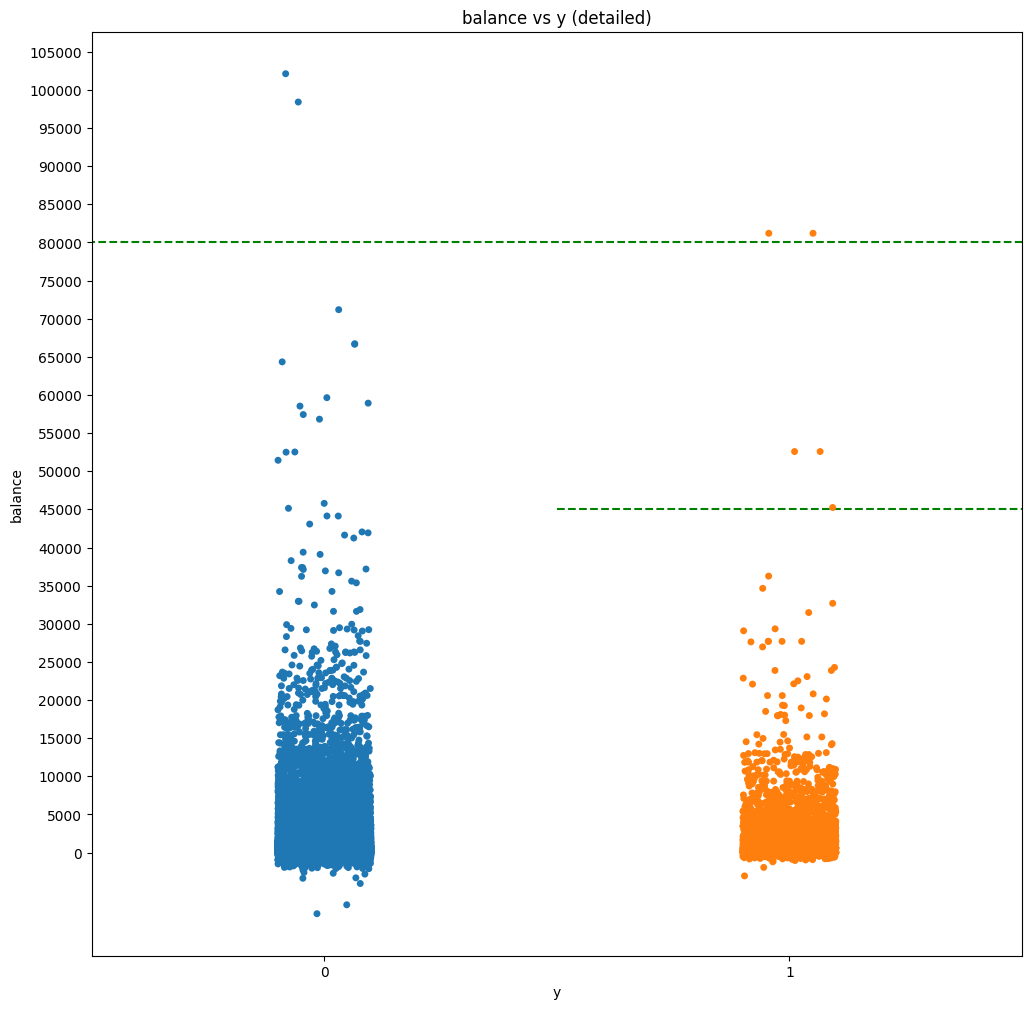

In [27]:
plt.figure(figsize=(12, 12))
plt.title('balance vs y (detailed)')
plt.yticks(np.arange(0, 120000, 5000))
plt.plot(np.arange(-1, 3, 1), np.full(4, 80000), 'g--')
plt.plot(np.arange(0.5, 3, 1), np.full(3, 45000), 'g--')
sns.stripplot(x="y", y="balance", data=dfEX1)
plt.savefig('img/balance-y-detailed.png', bbox_inches='tight')

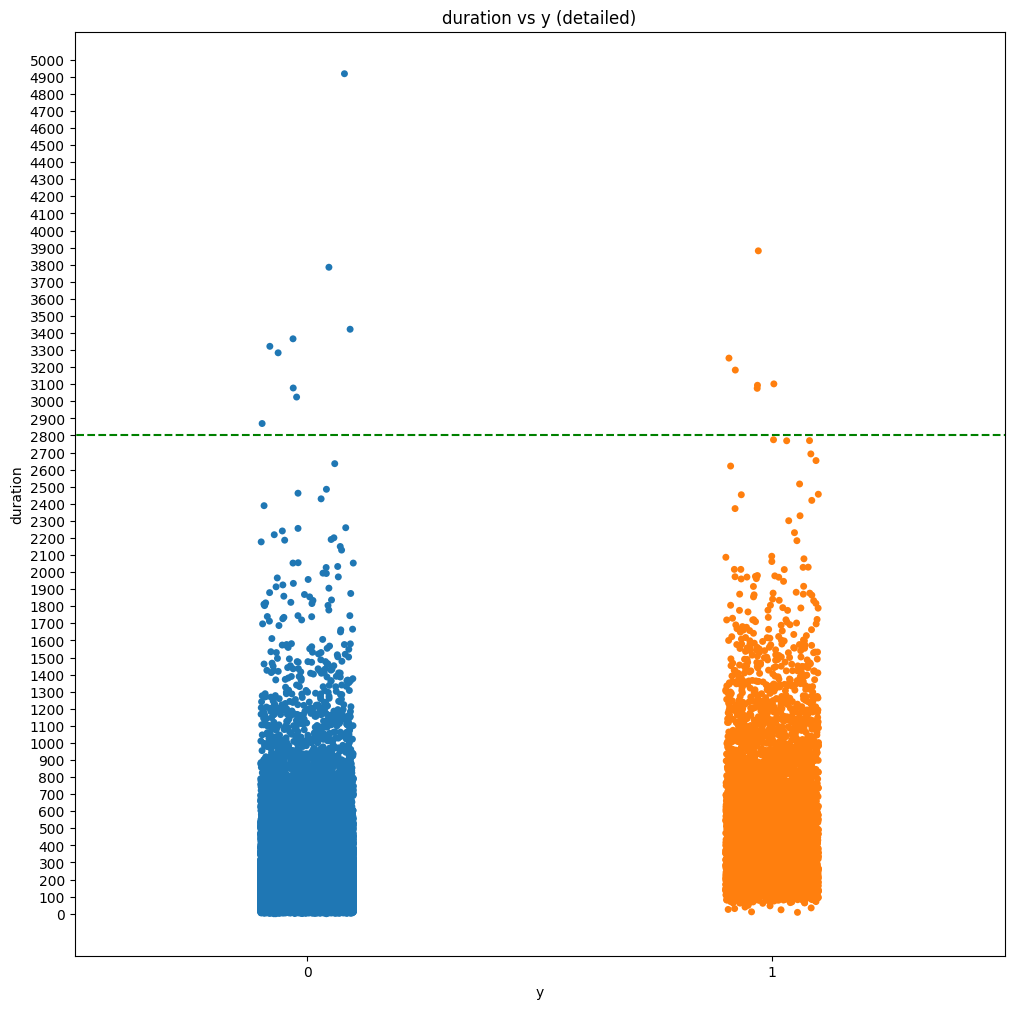

In [28]:
plt.figure(figsize=(12, 12))
plt.title('duration vs y (detailed)')
plt.yticks(np.arange(0, 5100, 100))
plt.plot(np.arange(-1, 3, 1), np.full(4, 2800), 'g--')
sns.stripplot(x="y", y="duration", data=dfEX1)
plt.savefig('img/duration-y-detailed.png', bbox_inches='tight')

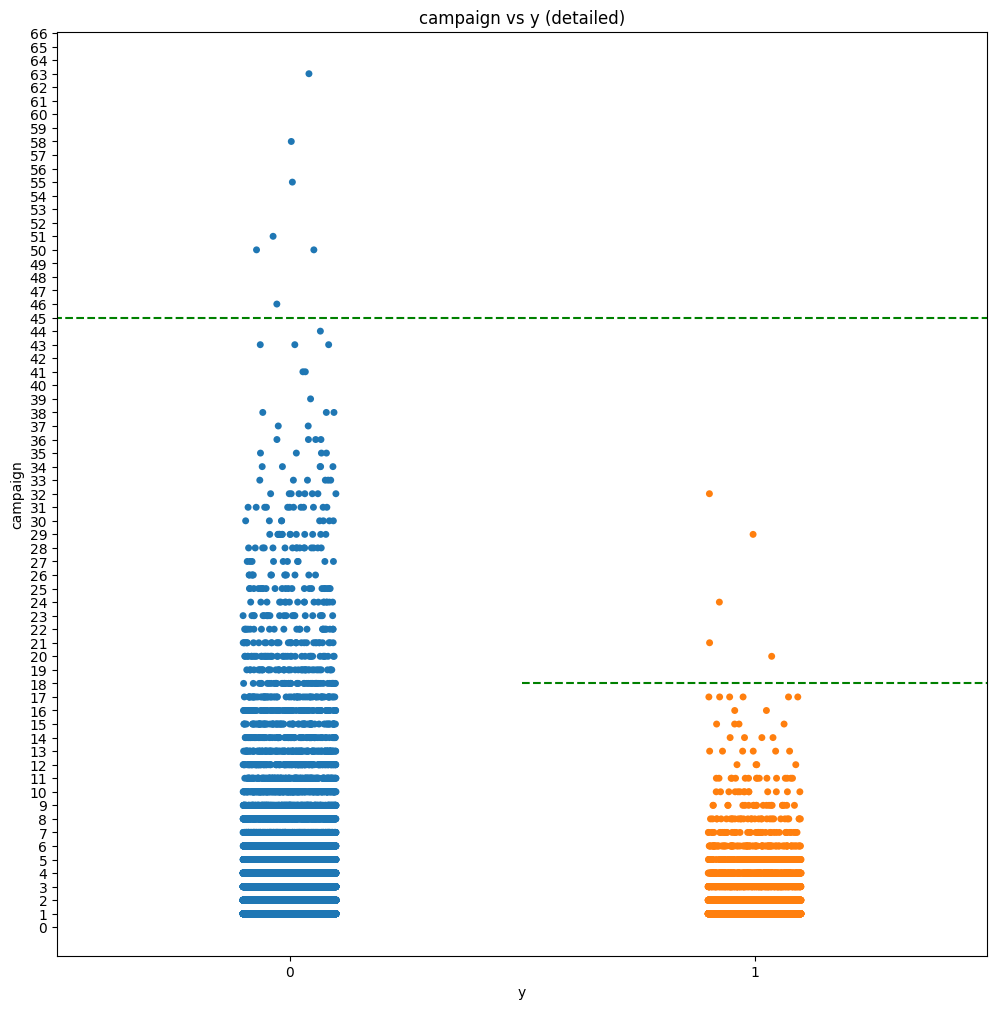

In [29]:
plt.figure(figsize=(12, 12))
plt.title('campaign vs y (detailed)')
plt.yticks(np.arange(0, 70, 1))
plt.plot(np.arange(-1, 3, 1), np.full(4, 45), 'g--')
plt.plot(np.arange(0.5, 3, 1), np.full(3, 18), 'g--')
sns.stripplot(x="y", y="campaign", data=dfEX1)
plt.savefig('img/campaign-y-detailed.png', bbox_inches='tight')

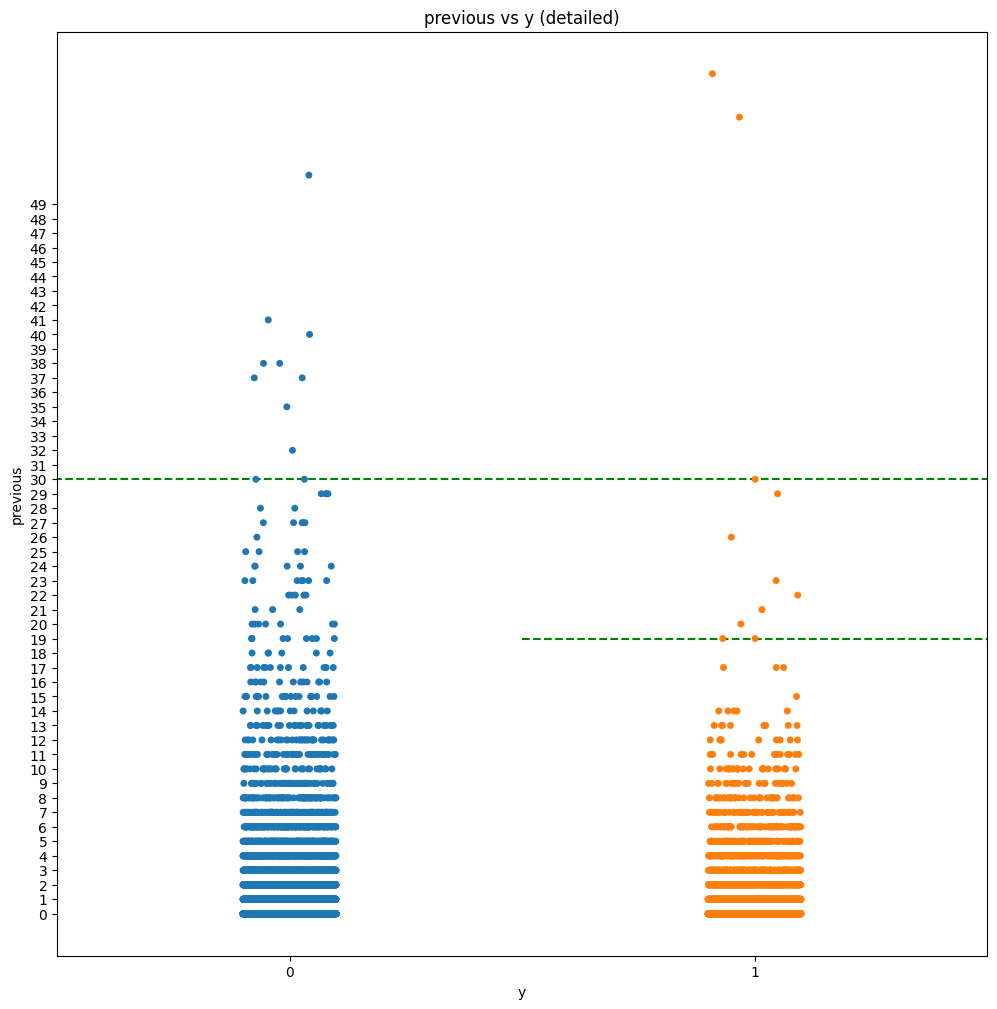

In [30]:
dfEX1 = dfEX1.drop(dfEX1[dfEX1['previous'] > 60].index)
plt.figure(figsize=(12, 12))
plt.title('previous vs y (detailed)')
plt.yticks(np.arange(0, 50, 1))
plt.plot(np.arange(-1, 3, 1), np.full(4, 30), 'g--')
plt.plot(np.arange(0.5, 3, 1), np.full(3, 19), 'g--')
sns.stripplot(x="y", y="previous", data=dfEX1)
plt.savefig('img/previous-y-detailed.png', bbox_inches='tight')

In [31]:
dfEX1 = dfEX1.drop(dfEX1[dfEX1['balance'] >= 50000].index)
dfEX1 = dfEX1.drop(dfEX1[dfEX1['balance'] >= 45000].index & dfEX1[dfEX1['y'] == 1].index)
dfEX1 = dfEX1.drop(dfEX1[dfEX1['duration'] >= 2800].index)
dfEX1 = dfEX1.drop(dfEX1[dfEX1['campaign'] >= 45].index)
dfEX1 = dfEX1.drop(dfEX1[dfEX1['campaign'] >= 18].index & dfEX1[dfEX1['y'] == 1].index)
dfEX1 = dfEX1.drop(dfEX1[dfEX1['previous'] >= 30].index)
dfEX1 = dfEX1.drop(dfEX1[dfEX1['previous'] >= 19].index & dfEX1[dfEX1['y'] == 1].index)

dfEX1.shape

(45142, 17)

After removing outliers, we are left with <u>**45142 instances**</u> (originally 45211 instances).

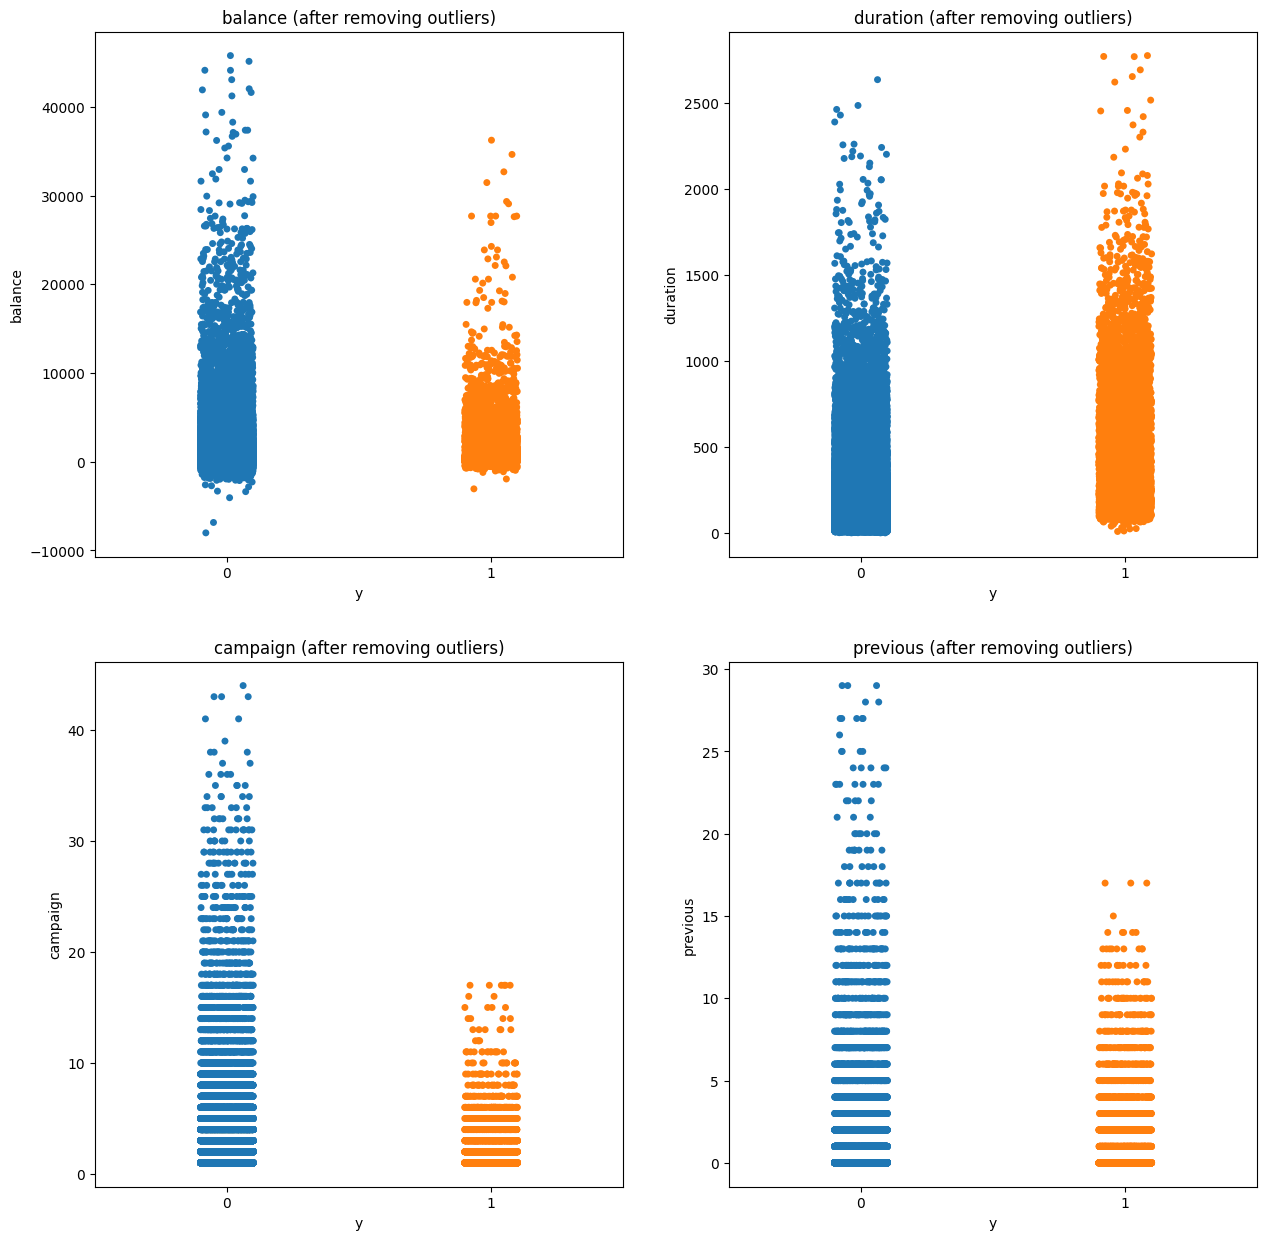

In [32]:
plt.figure(figsize=(15, 15))
for idx, col in enumerate(['balance', 'duration', 'campaign', 'previous']):
    plt.subplot(2, 2, idx+1)
    sns.stripplot(x='y', y=col, data=dfEX1)
    plt.title(col + ' (after removing outliers)')
plt.savefig('img/SelectedHists-After.png', bbox_inches='tight')

<hr>

### **Benchmarking** (Remove Outliers)

In [33]:
#get the dummy variables for the categorical 
dfEX1_BM = dfEX1.copy()
dfEX1_BM = pd.get_dummies(dfEX1_BM, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

xEX1 = dfEX1_BM.drop(['y'], axis = 1)
yEX1 = dfEX1_BM['y']

xEX1_train, xEX1_test, yEX1_train, yEX1_test = train_test_split(xEX1, yEX1, test_size = 0.2, random_state = 0)

#### **Decision Tree Classifier**

In [34]:
DT_clf_Ex1 = DecisionTreeClassifier(random_state=0)
DT_clf_Ex1.fit(xEX1_train,yEX1_train)
print('Train score: ', DT_clf_Ex1.score(xEX1_train, yEX1_train))
print('Test score: ', DT_clf_Ex1.score(xEX1_test, yEX1_test))

Train score:  1.0
Test score:  0.8827112637058367


##### **Predict using Test Data**

In [35]:
yDT_pred_test = DT_clf_Ex1.predict(xEX1_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yEX1_test, y_pred=yDT_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yEX1_test, y_pred=yDT_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7965
           1       0.50      0.51      0.51      1064

    accuracy                           0.88      9029
   macro avg       0.72      0.72      0.72      9029
weighted avg       0.88      0.88      0.88      9029

Confusion matrix on Test data
[[7426  539]
 [ 520  544]]


#### **Multi-Layer Perceptron Classifier**

In [36]:
MLP_clf_Ex1 = MLPClassifier(random_state=1)
MLP_clf_Ex1.fit(xEX1_train,yEX1_train)
print('Train score: ', MLP_clf_Ex1.score(xEX1_train, yEX1_train))
print('Test score: ', MLP_clf_Ex1.score(xEX1_test, yEX1_test))

Train score:  0.8283443635256001
Test score:  0.8240115184405804


##### **Predict using Test Data**

In [37]:
yMLP_pred_test = MLP_clf_Ex1.predict(xEX1_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yEX1_test, y_pred=yMLP_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yEX1_test, y_pred=yMLP_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7965
           1       0.37      0.69      0.48      1064

    accuracy                           0.82      9029
   macro avg       0.66      0.77      0.69      9029
weighted avg       0.88      0.82      0.85      9029

Confusion matrix on Test data
[[6702 1263]
 [ 326  738]]


#### **K-Nearest Neighbors**

In [38]:
KN_clf_Ex1 = KNeighborsClassifier(n_jobs=-1)
KN_clf_Ex1.fit(xEX1_train,yEX1_train)
print('Train score: ', KN_clf_Ex1.score(xEX1_train, yEX1_train))
print('Test score: ', KN_clf_Ex1.score(xEX1_test, yEX1_test))

Train score:  0.9108908149419876
Test score:  0.8800531620334477


##### **Predict using Test Data**

In [39]:
yKN_pred_test = KN_clf_Ex1.predict(xEX1_test)

print("Classification report on Test data\n=======================")
print(classification_report(y_true=yEX1_test, y_pred=yKN_pred_test))

print("Confusion matrix on Test data\n=======================")
print(confusion_matrix(y_true=yEX1_test, y_pred=yKN_pred_test))

Classification report on Test data
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      7965
           1       0.48      0.27      0.34      1064

    accuracy                           0.88      9029
   macro avg       0.70      0.61      0.64      9029
weighted avg       0.86      0.88      0.86      9029

Confusion matrix on Test data
[[7661  304]
 [ 779  285]]


#### Conclusion

from the result of this Experiment we can compare 

1.Decision Tree
Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.93|0.92|0.93|0.87|Decision Tree|Test Data|
1|0.45|0.47|0.46|^|Decision Tree|Test Data|
0|0.93|0.93|0.93|0.90|Decision Tree|Test Ex1 Data|
1|0.50|0.51|0.51|^|Decision Tree|Test Ex1 Data|

2.MLP
Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.93|0.94|0.94|0.89|MLP|Test Data|
1|0.52|0.49|0.51|^|MLP|Test Data|
0|0.93|0.95|0.94|0.89|MLP|Test Ex1 Data|
1|0.55|0.42|0.48|^|MLP|Test Ex1 Data|

3.K-Nearest
Class Target|Precision|Recall|f1-score|Model Score (Accuracy)|Model|Predict using|
:-:|:-:|:-:|:-:|:-:|:-:|:-:|
0|0.91|0.96|0.93|0.88|K-Nearest|Test Data|
1|0.46|0.25|0.33|^|K-Nearest|Test Data|
0|0.91|0.96|0.93|0.88|K-Nearest|Test Ex1 Data|
1|0.48|0.27|0.34|^|K-Nearest|Test Ex1 Data|
 
from the result above, เราจะสามารถเห็นได้ว่าการตัด outlier ออกจาก Data ของเราสามารถทำให้ประสิทธภาพในการ Train Model ของเรามากขึ้นดังนั้นแล้วเราจะพิจารณการตัด Outlier ทิ้ง

In [40]:
df = dfEX1.copy()

### **Experiment 2 : Data Scaling**

In [41]:
dfEX2 = dfEX1.copy()

In [42]:
numeric_features = dfNum.select_dtypes(include=['int64', 'float64']).columns

MinMaxScale = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

StandardScale = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

RobustScale = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

In [43]:
dfMMS = MinMaxScale.fit_transform(dfEX2[numeric_features])
dfSS = StandardScale.fit_transform(dfEX2[numeric_features])
dfRS = RobustScale.fit_transform(dfEX2[numeric_features])

### **Feature Encoding**

In [44]:
class betterLabelEncoder():
    def __init__(self, toEncode:list, columnToEncode:list):
        self.toEncode = toEncode
        self.columnToEncode = columnToEncode
        
    def transform(self,X,y=None,**transform_params):
        for toEn, colToEn in zip(self.toEncode, self.columnToEncode):
            X[colToEn] = X[colToEn].apply(lambda x: toEn.index(x))
        return X
    
    def fit(self, X, y=None, **fit_params):
        return self

In [45]:
class ToDummiesTransformer(BaseEstimator, TransformerMixin):
    """ A Dataframe transformer that provide dummy variable encoding
    """
    
    def transform(self, X, **transformparams):
        """ Returns a dummy variable encoded version of a DataFrame
        
        Parameters
        ----------
        X : pandas DataFrame
        
        Returns
        ----------
        trans : pandas DataFrame
        
        """
    
        trans = pd.get_dummies(X).copy()
        return trans

    def fit(self, X, y=None, **fitparams):
        """ Do nothing operation
        
        Returns
        ----------
        self : object
        """
        return self

In [46]:
toEncode = [["single","married","divorced"], ["unknown","primary","secondary","tertiary"], ["no","yes"], ["no","yes"], ["no","yes"], ["unknown","jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"], ["failure","success","unknown","other"]]
columnToEncode = ['marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome']
columnToOnehot = ['job', 'contact']

LE_pipeline = Pipeline([
    ("LabelEncoder", betterLabelEncoder(toEncode, columnToEncode)),
    ("OneHotEncoder", ToDummiesTransformer())
])

In [47]:
df = LE_pipeline.fit_transform(df)

In [48]:
X, y = df.drop(['y'], axis = 1), df['y']
df = pd.concat([X, y], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45142 entries, 0 to 45210
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45142 non-null  int64
 1   balance            45142 non-null  int64
 2   day                45142 non-null  int64
 3   duration           45142 non-null  int64
 4   campaign           45142 non-null  int64
 5   pdays              45142 non-null  int64
 6   previous           45142 non-null  int64
 7   marital            45142 non-null  int64
 8   education          45142 non-null  int64
 9   default            45142 non-null  int64
 10  housing            45142 non-null  int64
 11  loan               45142 non-null  int64
 12  month              45142 non-null  int64
 13  poutcome           45142 non-null  int64
 14  job_admin.         45142 non-null  uint8
 15  job_blue-collar    45142 non-null  uint8
 16  job_entrepreneur   45142 non-null  uint8
 17  job_housemai

### **Experiment 3 : Data Imbalance**

#### **Hypothesis**
    
Imbalance data affects model's performance.

<AxesSubplot:ylabel='Type'>

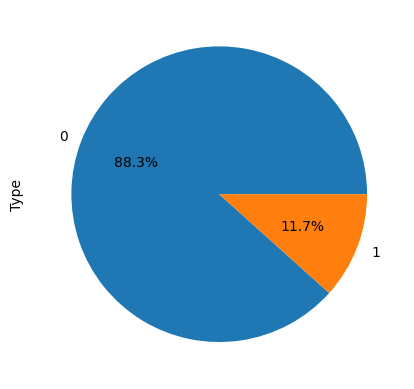

In [49]:
df.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')

In [50]:
dfDI = df.copy()

xdi_train , xdi_test , ydi_train , ydi_test = train_test_split(dfDI.drop(['y'], axis = 1), dfDI['y'], test_size = 0.2, random_state = 0)

In [51]:
dfDI.head()

,age,balance,day,duration,campaign,pdays,previous,marital,education,default,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown,y
0,58,2143,5,261,1,-1,0,1,3,0,...,0,0,0,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,2,0,...,0,0,0,1,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,1,2,0,...,0,0,0,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


So, We consider to use 6 different methods to address the imbalance data problem.
1. Random Oversampling
2. SMOTE
3. ADASYN
4. Random Undersampling
5. Tomek Links
6. NearMiss

#### **Random Oversampling**

#### **SMOTE**

In [52]:
smote = SMOTE(random_state=0)
x_su, y_su = smote.fit_resample(xdi_train, ydi_train)
dfDI_SM = pd.concat([x_su, y_su], axis=1)

<AxesSubplot:ylabel='Type'>

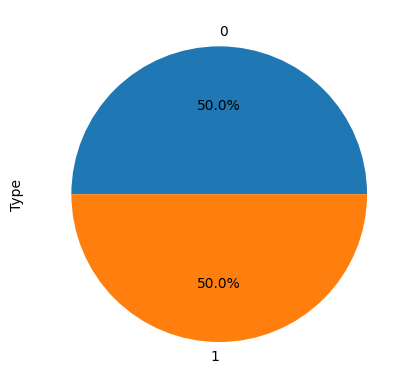

In [53]:
dfDI_SM.groupby('y').size().plot(kind='pie',
                            y = "y",
                            label = "Type",
                            autopct='%1.1f%%')

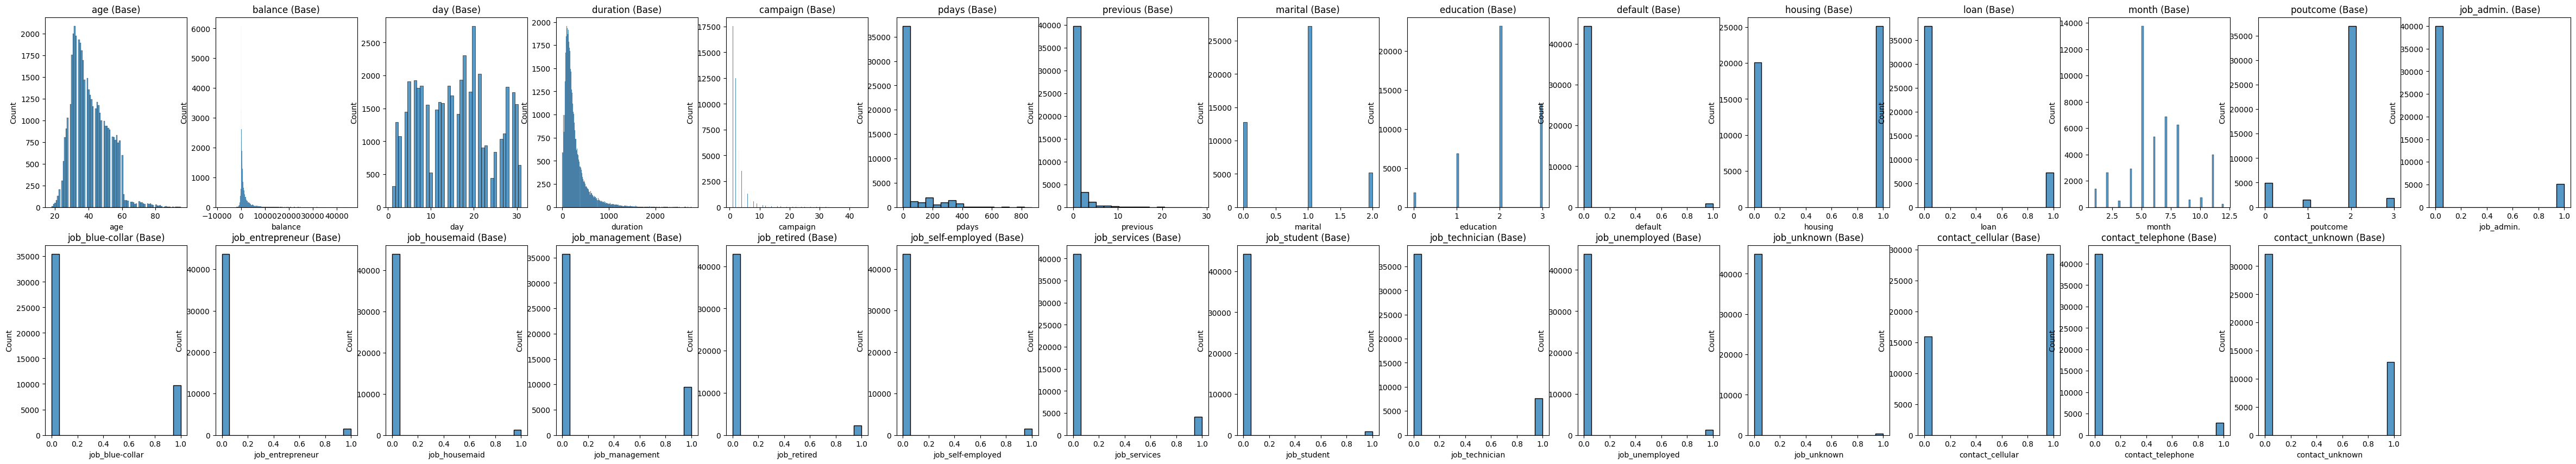

In [54]:
plt.figure(figsize=(60, 10))
for idx, col in enumerate(df.columns):
    if col != 'y':
        plt.subplot(2, 15, idx+1)
        sns.histplot(df[col], kde=False)
        plt.title(col + ' (Base)')

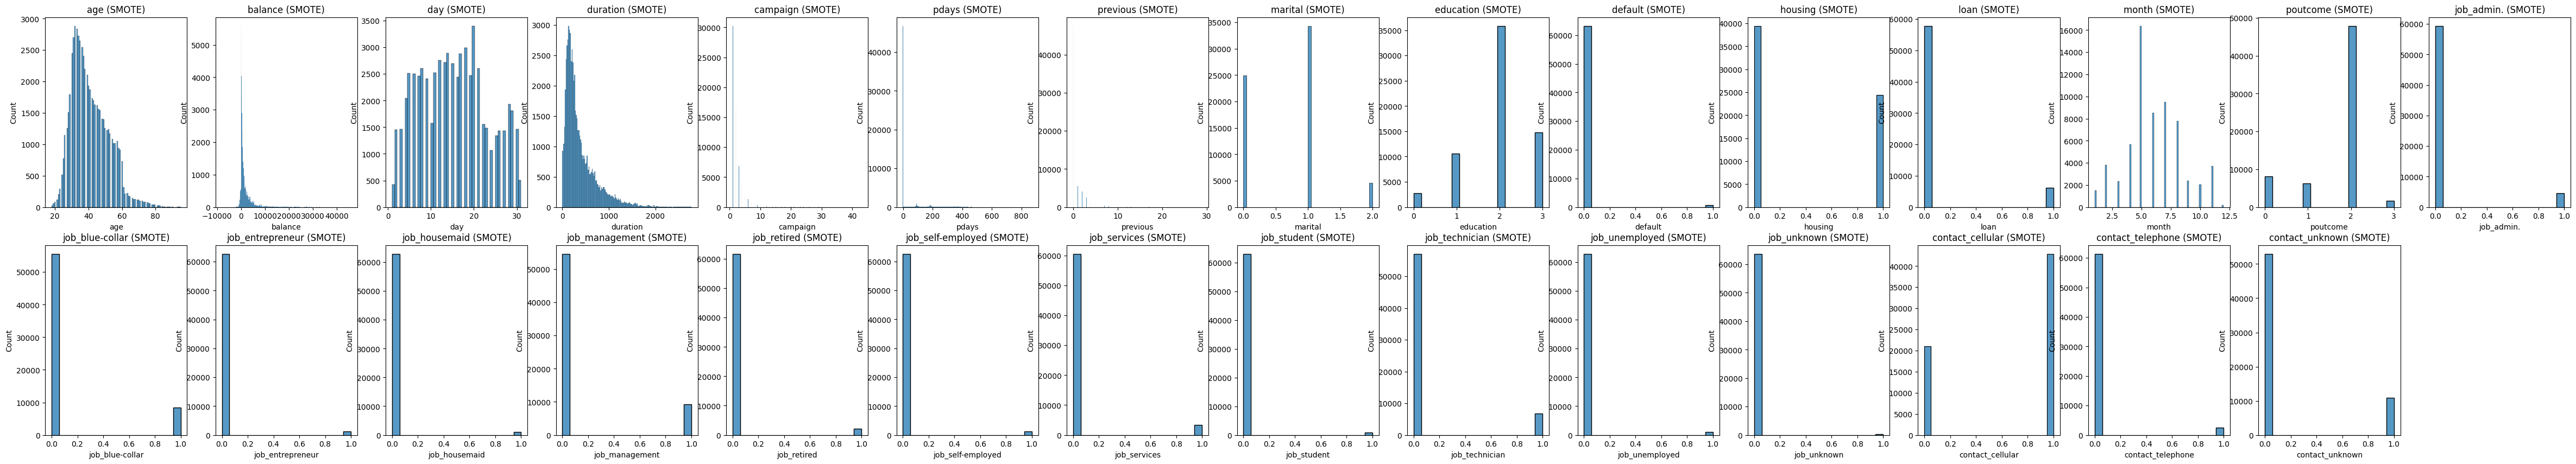

In [55]:
plt.figure(figsize=(60, 10))
for idx, col in enumerate(dfDI_SM.columns):
    if col != 'y':
        plt.subplot(2, 15, idx+1)
        sns.histplot(dfDI_SM[col], kde=False)
        plt.title(col + ' (SMOTE)')

We can see that in some features, the data not have the same distribution as the original data.

### **Experiment 4 : Data Transform**

# Test code

In [56]:
class columnDropperTransformer():
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None,**transform_params):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None, **fit_params):
        return self 


In [57]:
toEncode = [["single","married","divorced"], ["unknown","primary","secondary","tertiary"]]
columnToEncode = ['marital', 'education']

LE_pipeline = Pipeline([
    ("LabelEncoder", betterLabelEncoder(toEncode, columnToEncode))
])

In [58]:
drop_features = ['duration']
# drop_transformer = ColumnTransformer(transformers=['drop_columns', 'drop', drop_features], remainder='passthrough')
drop_pipeline = Pipeline([
    ("columnDropper", columnDropperTransformer(drop_features))
])

In [59]:
dfpipe = dfOri.copy()

numeric_features = dfpipe.select_dtypes(include=['int64', 'float64']).columns.drop('duration')

categorical_features = dfpipe.select_dtypes(include=['object']).drop(['y'], axis=1).columns

numeric_transformer = Pipeline(steps=[
      ('imputer', SimpleImputer(strategy='mean')),
      ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='constant')),
      ('encoder', OneHotEncoder())
])

preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
   ,('categorical', categorical_transformer, categorical_features)
]) 

pipeline_tree = Pipeline(steps = [
            ('drop', drop_pipeline),
            ('preprocessor', preprocessor),
            ('regressor',DecisionTreeClassifier())
           ])

In [60]:
x = dfpipe.drop(['y'], axis = 1)
y = dfpipe['y']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

clf_tree = pipeline_tree.fit(x_train, y_train)

# clf = DecisionTreeClassifier()
# clf.fit(clf_tree.transform(x_train), y_train)
y_pred = clf_tree.predict(x_test)

print("Classification report on Train data\n=======================")
print(classification_report(y_true=y_test, y_pred=y_pred))
print("Confusion matrix on Train data\n=======================")

print(confusion_matrix(y_true=y_test, y_pred=y_pred))

Classification report on Train data
              precision    recall  f1-score   support

          no       0.91      0.90      0.90      7980
         yes       0.31      0.35      0.33      1063

    accuracy                           0.83      9043
   macro avg       0.61      0.62      0.62      9043
weighted avg       0.84      0.83      0.84      9043

Confusion matrix on Train data
[[7153  827]
 [ 690  373]]


In [61]:
clf_tree

Pipeline(steps=[('drop',
                 Pipeline(steps=[('columnDropper',
                                  <__main__.columnDropperTransformer object at 0x0000014ECC43A490>)])),
                ('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('regressor', DecisionTreeClassifier())])

In [62]:
# check unknown values
dfOri.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64